#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [9]:
model.add(Dropout(rate=0.25))

In [10]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
#卷積層2與池化層2

In [12]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [15]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [16]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [17]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(10, activation='softmax'))

In [19]:
#檢查model 的STACK
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0

# 載入之前訓練的模型

In [20]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_mse = model
model_binary = model

model_mse.compile(loss='mean_squared_error', optimizer='Adam', metrics=['accuracy'])
model_binary.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [22]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                          validation_split=0.25,
                          epochs=10, batch_size=128, verbose=1)   

train_history_mse = model_mse.fit(x_img_train_normalize, y_label_train_OneHot,
                                  validation_split=0.25,
                                  epochs=10, batch_size=128, verbose=1)  

train_history_binary = model_binary.fit(x_img_train_normalize, y_label_train_OneHot,
                                validation_split=0.25,
                                epochs=10, batch_size=128, verbose=1) 

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
293/293 [==============================] - ETA: 0s - loss: 0.2626 - accuracy: 0.3750WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001C36E150CA8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

In [23]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

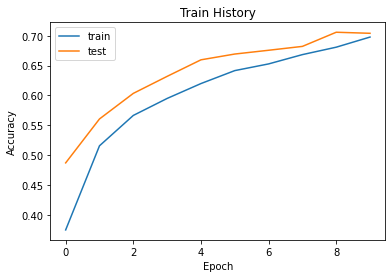

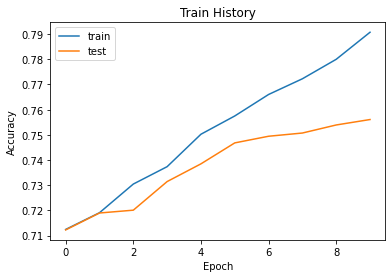

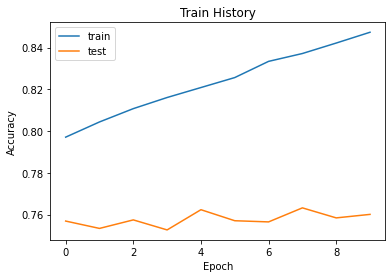

In [25]:
show_train_history(train_history,"accuracy","val_accuracy")
show_train_history(train_history_mse,"accuracy","val_accuracy")
show_train_history(train_history_binary,"accuracy","val_accuracy")